In [68]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

## DF Parsing

In [69]:
df_undernourishment = pd.read_csv(".\Datasets\Processed\Prevalence_of_Undernourishment_Processed.csv")
df_net_fdi = pd.read_csv(".\Datasets\Processed/Net_FDI_Processed.csv")
df_cpi = pd.read_csv(".\Datasets\Processed\CPI_Food_Processed.csv", encoding="ISO-8859-1")
df_socio_factors = pd.read_csv(".\Datasets\Processed\SocioFactors_Processed.csv", encoding="ISO-8859-1")

In [70]:
df_cpi.rename(columns={"ISO3 Code": "ISO3_Code"}, inplace=True) # remove after CPI df col naming resolved
df_undernourishment.drop("Unnamed: 0", axis=1, inplace=True)
df_net_fdi.drop("Unnamed: 0", axis=1, inplace=True)

print(df_undernourishment.columns)
print(df_net_fdi.columns)
print(df_cpi.columns)
print(df_socio_factors.columns)

Index(['M49_Code', 'Country_Name', 'Prevalence_of_undernourishment_2016',
       'Prevalence_of_undernourishment_2017',
       'Prevalence_of_undernourishment_2018',
       'Prevalence_of_undernourishment_2019',
       'Prevalence_of_undernourishment_2020'],
      dtype='object')
Index(['M49_Code', 'Country_Name', 'Total_FDI_Inflows_2016',
       'Total_FDI_Inflows_2017', 'Total_FDI_Inflows_2018',
       'Total_FDI_Inflows_2019', 'Total_FDI_Inflows_2020',
       'Total_FDI_Outflows_2016', 'Total_FDI_Outflows_2017',
       'Total_FDI_Outflows_2018', 'Total_FDI_Outflows_2019',
       'Total_FDI_Outflows_2020', 'Net_FDI_2016', 'Net_FDI_2017',
       'Net_FDI_2018', 'Net_FDI_2019', 'Net_FDI_2020'],
      dtype='object')
Index(['M49_Code', 'Country_Name', 'ISO3_Code', 'CPI_Food_2016',
       'CPI_Food_2017', 'CPI_Food_2018', 'CPI_Food_2019', 'CPI_Food_2020',
       'CPI_Food_Avg'],
      dtype='object')
Index(['ISO3_Code', 'Country_Name', 'M49_Code', 'Life_Expectancy_2016',
       'Life_Exp

In [71]:
# print(df_undernourishment.dtypes)
# print(df_net_fdi.dtypes)
print(df_cpi.dtypes)
print(df_socio_factors.dtypes)

M49_Code           int64
Country_Name      object
ISO3_Code         object
CPI_Food_2016    float64
CPI_Food_2017    float64
CPI_Food_2018    float64
CPI_Food_2019    float64
CPI_Food_2020    float64
CPI_Food_Avg     float64
dtype: object
ISO3_Code                        object
Country_Name                     object
M49_Code                        float64
Life_Expectancy_2016            float64
Life_Expectancy_2017            float64
Life_Expectancy_2018            float64
Life_Expectancy_2019            float64
Life_Expectancy_2020            float64
Life_Expectancy_Avg             float64
Mean_Years_Of_Schooling_2016    float64
Mean_Years_Of_Schooling_2017    float64
Mean_Years_Of_Schooling_2018    float64
Mean_Years_Of_Schooling_2019    float64
Mean_Years_Of_Schooling_2020    float64
Mean_Years_of_Schooling_Avg     float64
dtype: object


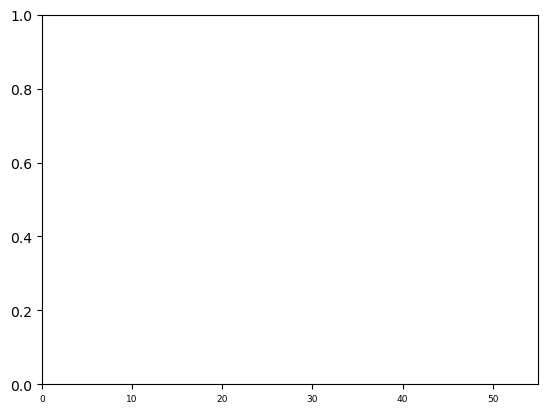

In [93]:
def custom_settings(
    markersize: float = 2,
    linewidth: float = 0.5,
    labelsize: float = 6.5
):
    mpl.rcdefaults()
    mpl.rcParams["lines.markersize"] = markersize
    mpl.rcParams["lines.linewidth"] = linewidth
    mpl.rcParams["xtick.labelsize"] = labelsize
    ax = plt.gca()
    ax.set_xlim((0, 55))
    # simplefilter(action="ignore")

custom_settings()

In [94]:
def split_cols_exceeding_thresh(
    df: pd.DataFrame,
    label_name: str,
    thresh: int = 5
) -> dict:
    """
    For the cols that exceed the categorical threshold 
        => This function will break down the unique vals of the col into n groups
            where n = n_unique values of the col / categorical threshold
    Returns dictionary where:
        keys => arbitrary names (1,2,3,4,...)
        values => list of values in the label col split according to the threshold
    """
    d = {}
    n_cuts = int(np.ceil((df[label_name].nunique()) / thresh))
    l = df[label_name].sort_values()
    col_names_l = np.array_split(l, n_cuts) 
    var_name_l = [i for i in range(0, n_cuts)]
    for j in range(len(var_name_l)):
        d[var_name_l[j]] = col_names_l[j]
    return d


## Prevalence of Undernourishment EDA

In [88]:
df_undernourishment.rename(columns={'Prevalence_of_undernourishment_2016': "2016 (%)",'Prevalence_of_undernourishment_2017': "2017 (%)",'Prevalence_of_undernourishment_2018': "2018 (%)",'Prevalence_of_undernourishment_2019': "2019 (%)", 'Prevalence_of_undernourishment_2020': "2020 (%)"}, inplace=True)

print(df_undernourishment.columns)

Index(['M49_Code', 'Country_Name', '2016 (%)', '2017 (%)', '2018 (%)',
       '2019 (%)', '2020 (%)'],
      dtype='object')


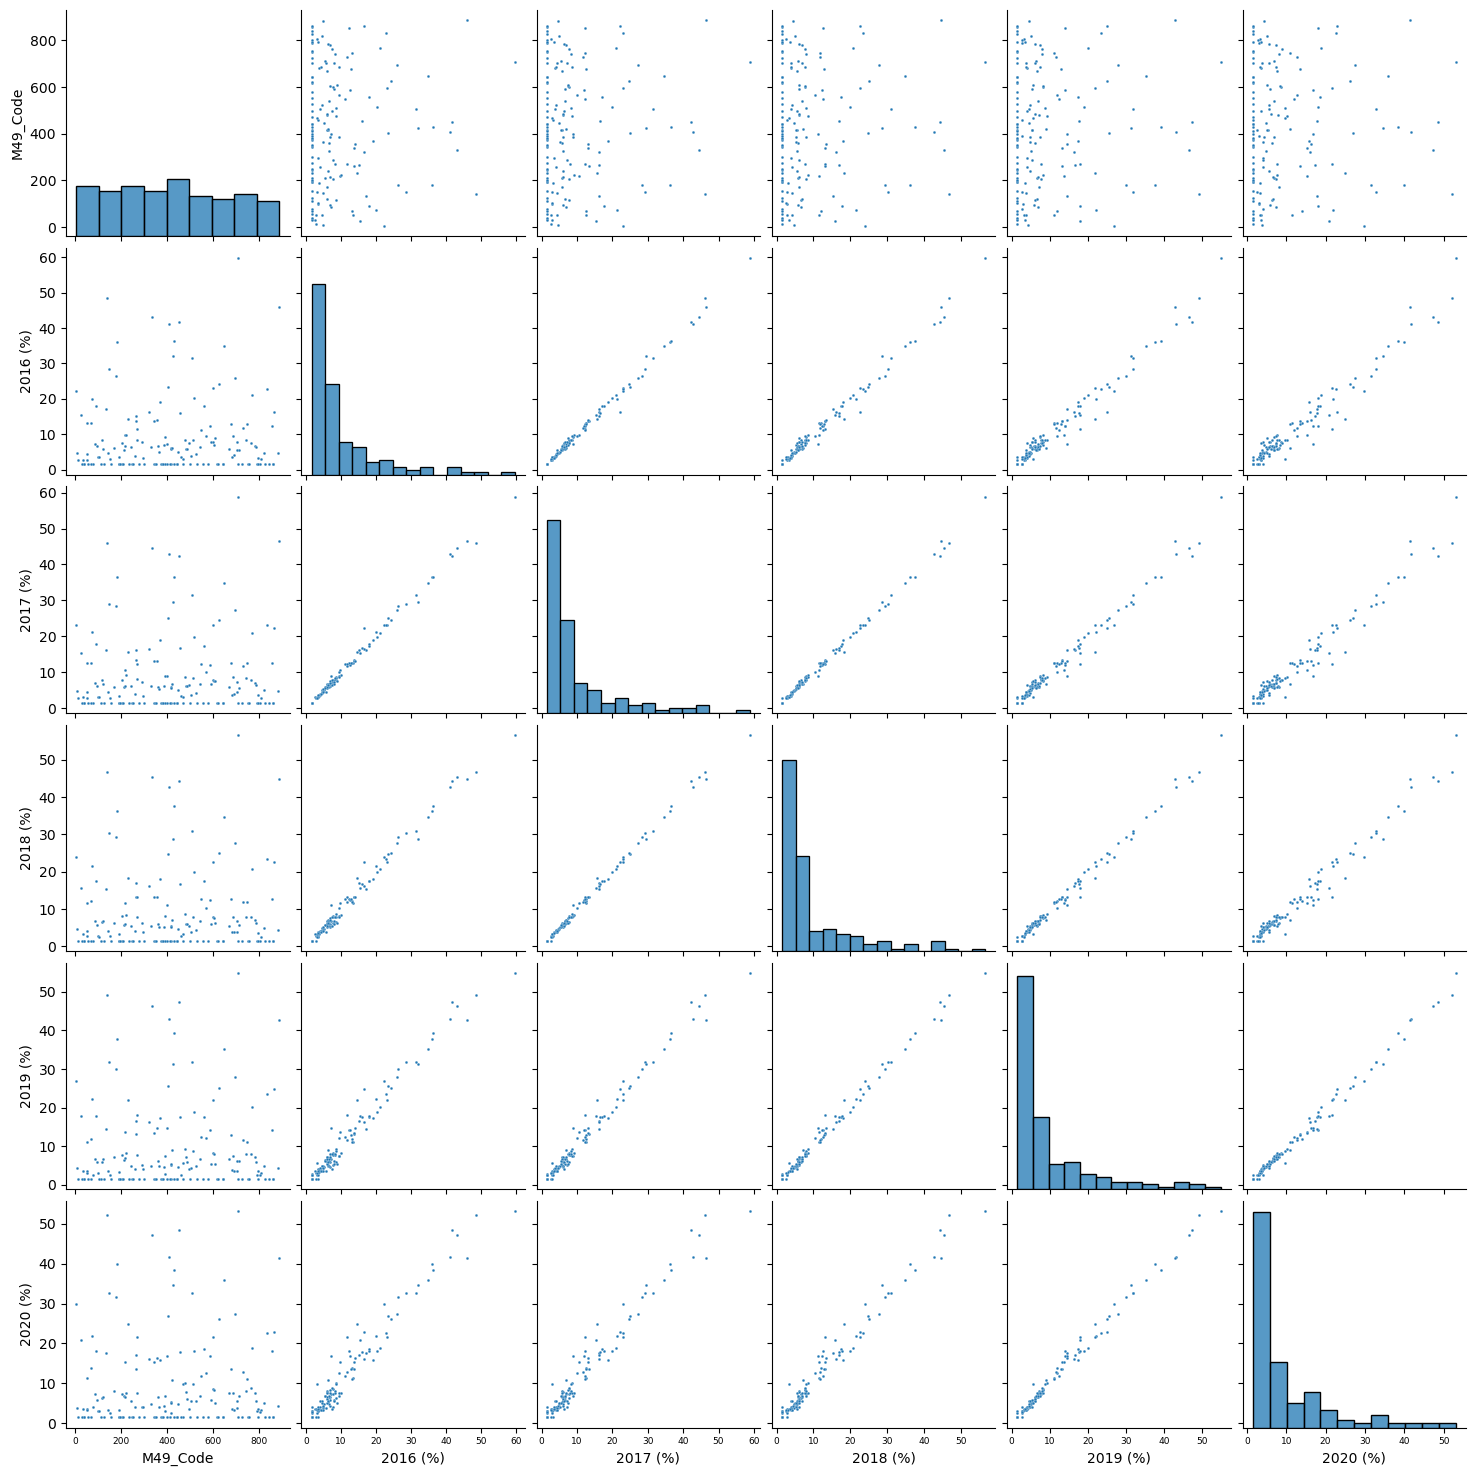

In [89]:
fig = sns.pairplot(data=df_undernourishment)

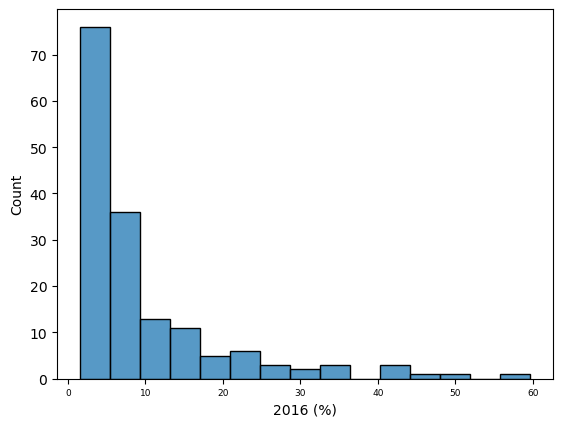

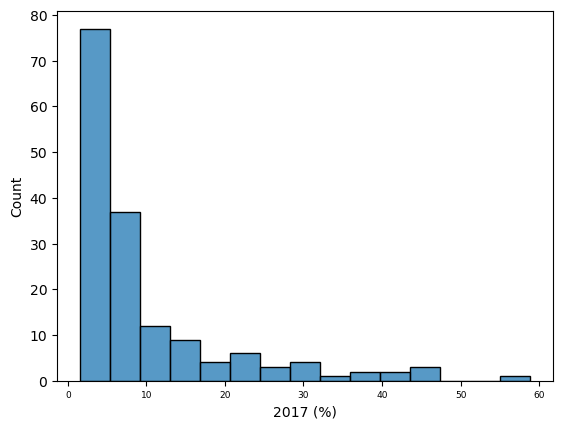

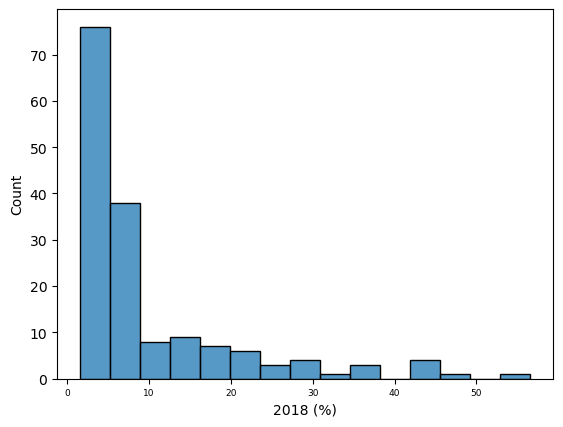

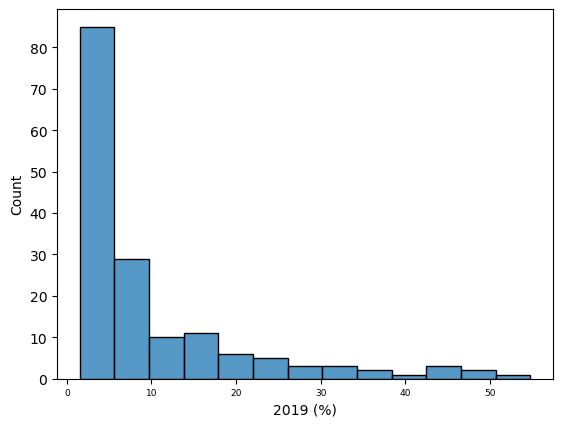

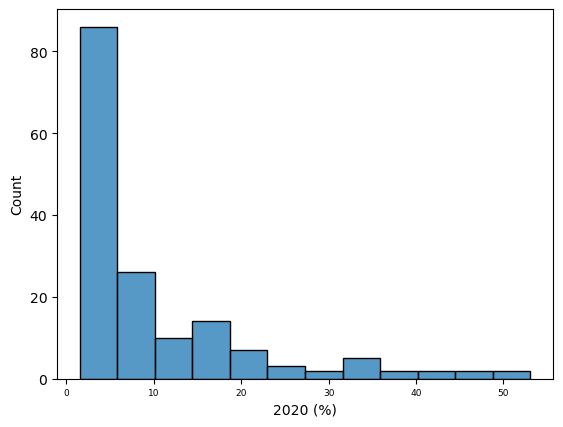

In [90]:
# cols = ['Prevalence_of_undernourishment_2016','Prevalence_of_undernourishment_2017','Prevalence_of_undernourishment_2018','Prevalence_of_undernourishment_2019', 'Prevalence_of_undernourishment_2020']
cols = ["2016 (%)", "2017 (%)", "2018 (%)","2019 (%)","2020 (%)"]

for col in cols:
    fig = sns.histplot(data=df_undernourishment, x=col)
    plt.show()

In [91]:
def split_cols_exceeding_thresh(
    df: pd.DataFrame,
    label_name: str,
    thresh: int = 5
) -> dict:
    """
    For the cols that exceed the categorical threshold 
        => This function will break down the unique vals of the col into n groups
            where n = n_unique values of the col / categorical threshold
    Returns dictionary where:
        keys => arbitrary names (1,2,3,4,...)
        values => list of values in the label col split according to the threshold
    """
    d = {}
    n_cuts = int(np.ceil((df[label_name].nunique()) / thresh))
    l = df[label_name].sort_values()
    col_names_l = np.array_split(l, n_cuts) 
    var_name_l = [i for i in range(0, n_cuts)]
    for j in range(len(var_name_l)):
        d[var_name_l[j]] = col_names_l[j]
    return d

country_names_split = split_cols_exceeding_thresh(df=df_undernourishment, label_name="Country_Name", thresh=7)